In [1]:
from google.colab import files
uploaded = files.upload()

Saving breast_cancer.csv to breast_cancer (2).csv


In [2]:
import pandas as pd
cancer=pd.read_csv("breast_cancer.csv")
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
cancer.shape

(569, 33)

In [4]:
cancer=cancer.drop(['Unnamed: 32','id'],axis=1)

In [5]:
cancer['diagnosis'].unique()

array(['M', 'B'], dtype=object)

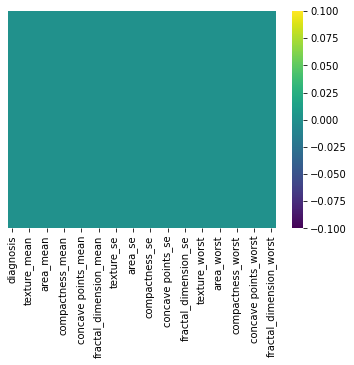

In [6]:
import seaborn as sns
sns.heatmap(cancer.isnull(),cmap='viridis',yticklabels='')
# No null data

[]

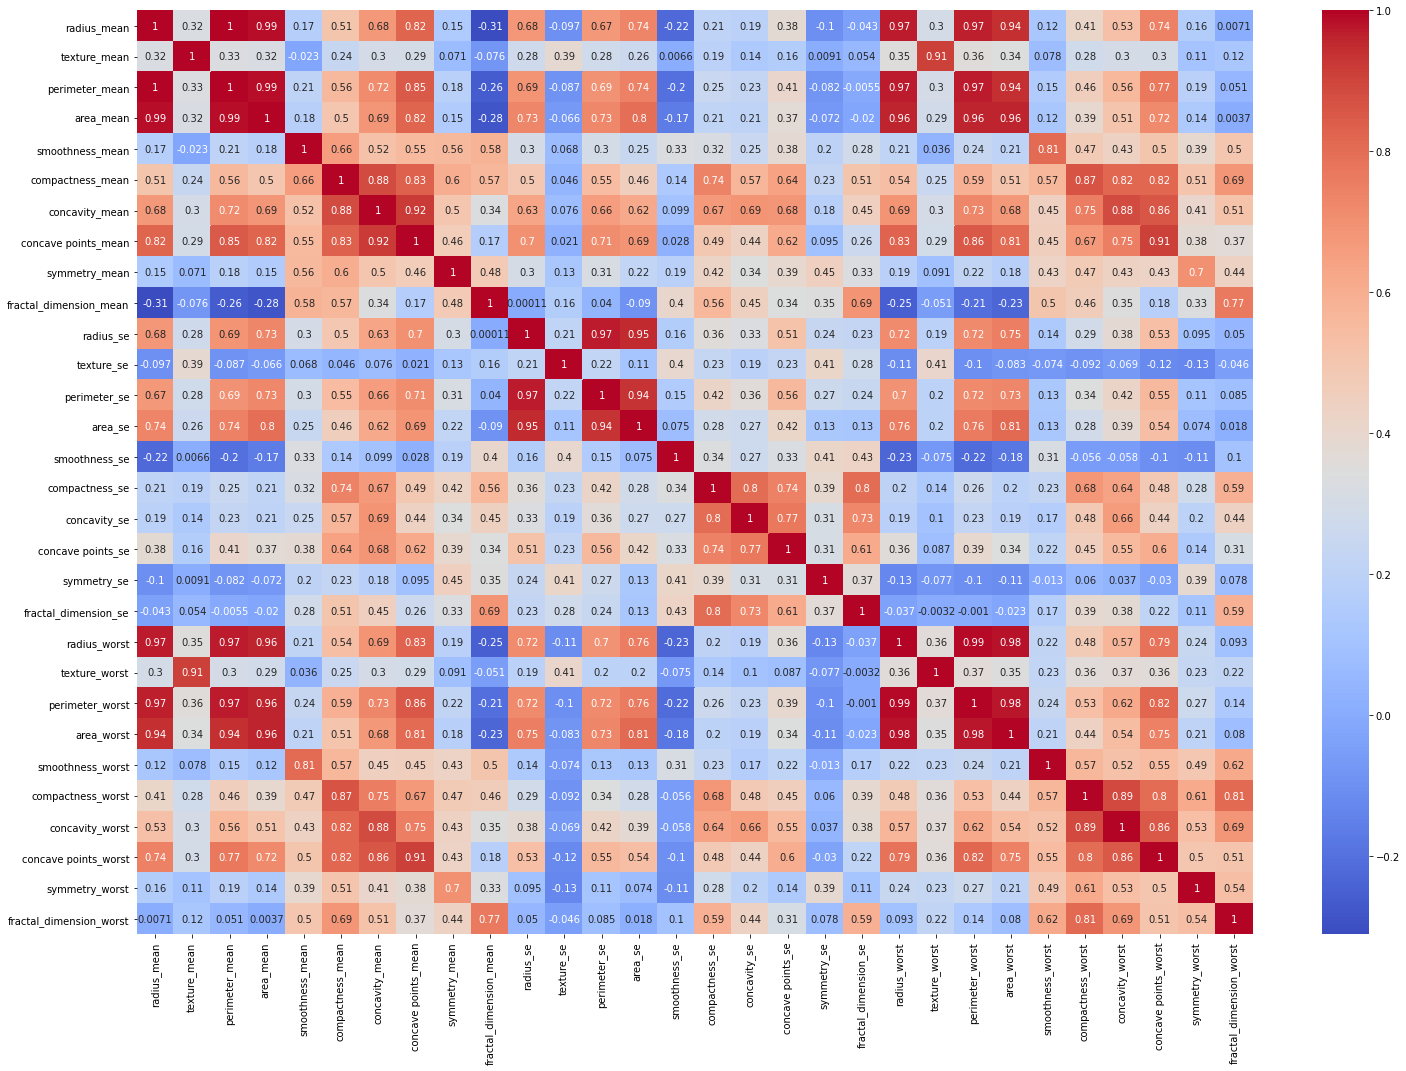

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,17))
sns.heatmap(cancer.corr(),cmap='coolwarm',annot=True)
plt.plot()

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cancer['diagnosis']=le.fit_transform(cancer['diagnosis'])

In [9]:
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
X=cancer.drop("diagnosis",axis=1)
y=cancer['diagnosis']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.22,random_state=103)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [14]:
model=Sequential()
model.add(Dense(units=90,activation='relu'))
model.add(Dense(units=134,activation='relu'))
model.add(Dense(units=56,activation='elu'))
model.add(Dense(units=95,activation='relu'))
model.add(Dense(units=45,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [15]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=150,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/150
14/14 [==============================] - 0s 14ms/step - loss: 0.6326 - accuracy: 0.7472 - val_loss: 0.5261 - val_accuracy: 0.9127
Epoch 2/150
14/14 [==============================] - 0s 3ms/step - loss: 0.4132 - accuracy: 0.8826 - val_loss: 0.2321 - val_accuracy: 0.9444
Epoch 3/150
14/14 [==============================] - 0s 4ms/step - loss: 0.2115 - accuracy: 0.9097 - val_loss: 0.0934 - val_accuracy: 0.9524
Epoch 4/150
14/14 [==============================] - 0s 3ms/step - loss: 0.1470 - accuracy: 0.9345 - val_loss: 0.0625 - val_accuracy: 0.9841
Epoch 5/150
14/14 [==============================] - 0s 3ms/step - loss: 0.1162 - accuracy: 0.9526 - val_loss: 0.0422 - val_accuracy: 0.9921
Epoch 6/150
14/14 [==============================] - 0s 3ms/step - loss: 0.0864 - accuracy: 0.9707 - val_loss: 0.0419 - val_accuracy: 0.9841
Epoch 7/150
14/14 [==============================] - 0s 3ms/step - loss: 0.0779 - accuracy: 0.9729 - val_loss: 0.0433 - val_accuracy: 0.9841
Epoch 8/150


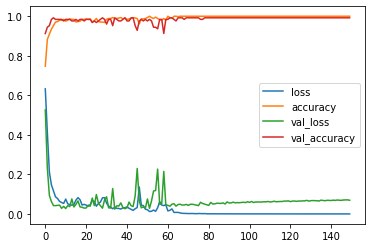

In [16]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [17]:
model1=Sequential()
model1.add(Dense(units=90,activation='relu'))
model1.add(Dense(units=134,activation='relu'))
model1.add(Dense(units=56,activation='elu'))
model1.add(Dense(units=95,activation='relu'))
model1.add(Dense(units=45,activation='relu'))
model1.add(Dense(units=1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [19]:
model1.fit(x=X_train, 
          y=y_train, 
          epochs=150,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/150
14/14 [==============================] - 0s 11ms/step - loss: 0.6123 - accuracy: 0.7223 - val_loss: 0.4816 - val_accuracy: 0.9206
Epoch 2/150
14/14 [==============================] - 0s 3ms/step - loss: 0.3705 - accuracy: 0.8826 - val_loss: 0.2243 - val_accuracy: 0.9286
Epoch 3/150
14/14 [==============================] - 0s 3ms/step - loss: 0.2114 - accuracy: 0.9007 - val_loss: 0.1127 - val_accuracy: 0.9762
Epoch 4/150
14/14 [==============================] - 0s 3ms/step - loss: 0.1396 - accuracy: 0.9503 - val_loss: 0.0649 - val_accuracy: 0.9841
Epoch 5/150
14/14 [==============================] - 0s 3ms/step - loss: 0.1126 - accuracy: 0.9549 - val_loss: 0.0625 - val_accuracy: 0.9841
Epoch 6/150
14/14 [==============================] - 0s 3ms/step - loss: 0.0921 - accuracy: 0.9639 - val_loss: 0.0468 - val_accuracy: 0.9841
Epoch 7/150
14/14 [==============================] - 0s 3ms/step - loss: 0.0761 - accuracy: 0.9752 - val_loss: 0.0384 - val_accuracy: 0.9841
Epoch 8/150


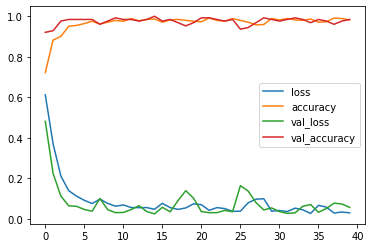

In [20]:
model1_loss = pd.DataFrame(model1.history.history)
model1_loss.plot()

In [31]:
test_predictions = model1.predict_classes(X_test)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,test_predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        73
           1       0.96      1.00      0.98        53

    accuracy                           0.98       126
   macro avg       0.98      0.99      0.98       126
weighted avg       0.98      0.98      0.98       126



In [33]:
print(confusion_matrix(y_test,test_predictions))

[[71  2]
 [ 0 53]]


In [46]:
train_pred = model1.predict_classes(X_test)

In [45]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       284
           1       1.00      0.99      0.99       159

    accuracy                           1.00       443
   macro avg       1.00      0.99      1.00       443
weighted avg       1.00      1.00      1.00       443



In [44]:
print(confusion_matrix(y_train,train_pred))

[[284   0]
 [  2 157]]
